<a href="https://colab.research.google.com/github/yasmine-juarez/capstone/blob/Yasmine/Clustering_based_off_efhstatus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering on All (Free, Partially Free, Not Free)


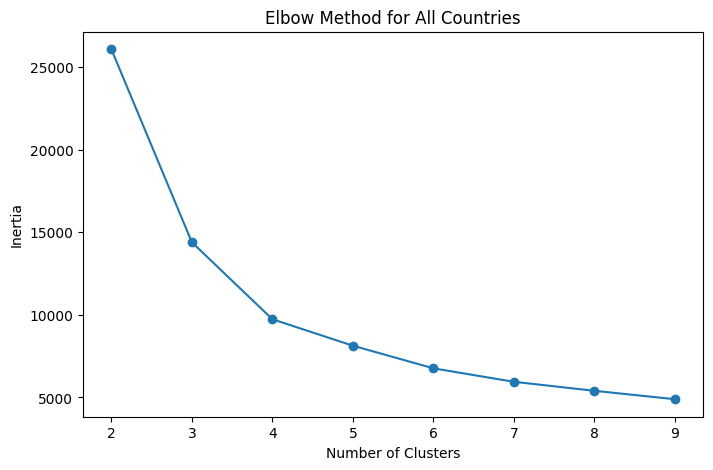

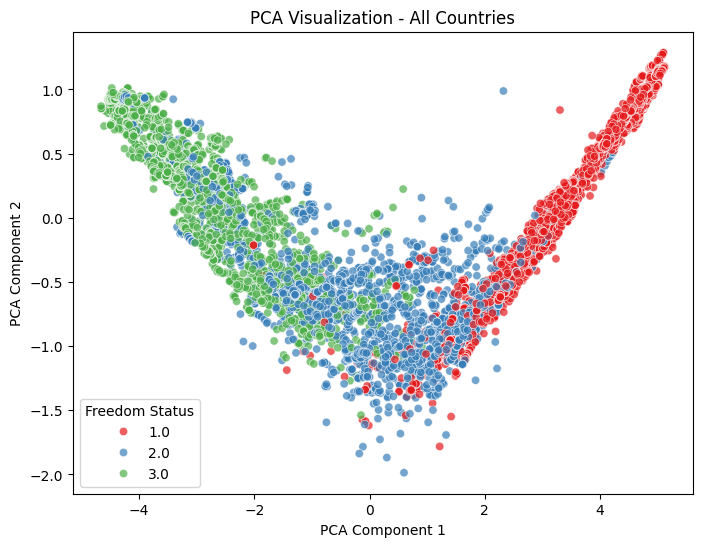

Clustering on Free & Partially Free


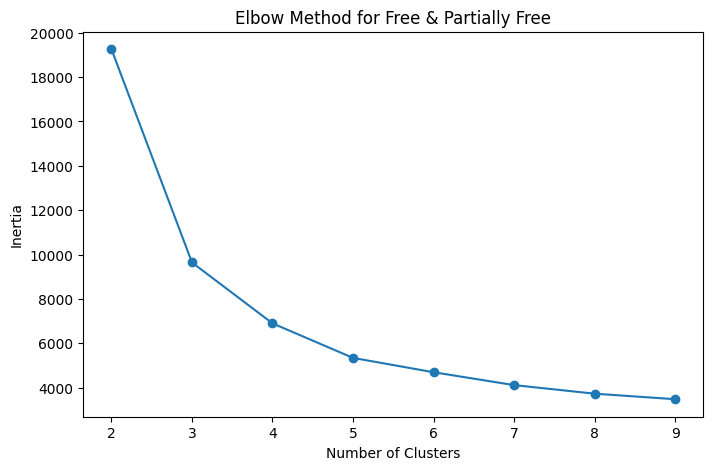

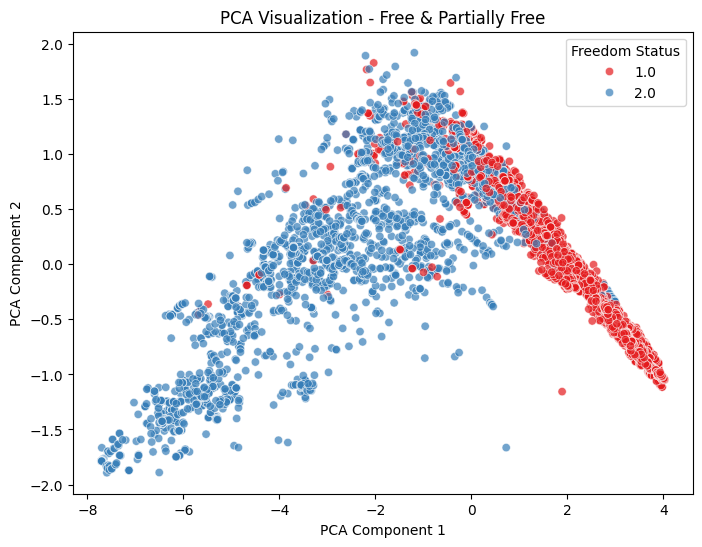

Clustering on Partially Free & Not Free


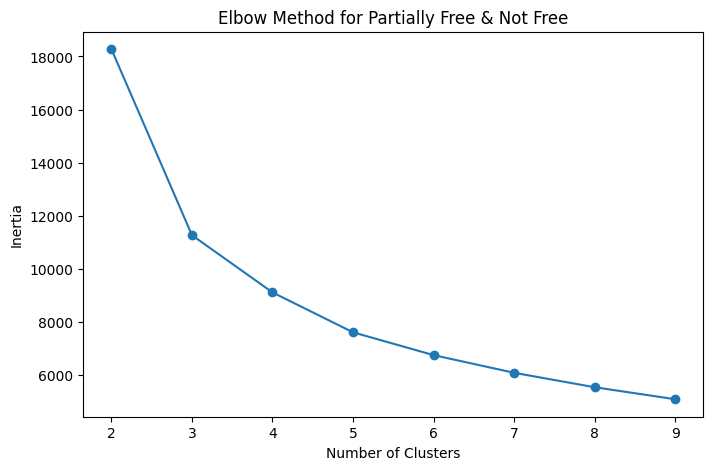

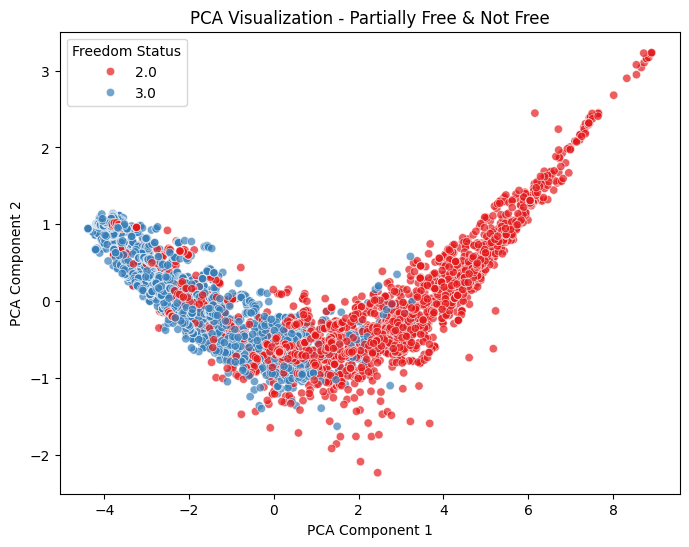

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv("/content/model_dataset (1).csv", low_memory=False)

features = ['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index',
            'v2x_accountability', 'v2x_partipdem', 'v2x_clpol',
            'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem']

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Function to perform clustering
def perform_kmeans(df_subset, df_scaled_subset, title):
    # Determine optimal clusters using the Elbow Method
    inertia = []
    sil_scores = []
    k_values = range(2, 10)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(df_scaled_subset)
        inertia.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(df_scaled_subset, labels))

    # Plot Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {title}')
    plt.show()

    # Choose optimal K
    k_optimal = 3
    kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
    df_subset = df_subset.assign(cluster=kmeans.fit_predict(df_scaled_subset))

    # PCA for visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_scaled_subset)
    df_subset = df_subset.assign(pca_1=pca_result[:, 0], pca_2=pca_result[:, 1])

    # Scatter plot of PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_subset['pca_1'], y=df_subset['pca_2'], hue=df_subset['e_fh_status'], palette='Set1', alpha=0.7)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'PCA Visualization - {title}')
    plt.legend(title='Freedom Status')
    plt.show()

    return df_subset

print("Clustering on All (Free, Partially Free, Not Free)")
df_all = perform_kmeans(df, df_scaled, "All Countries")

df_free_partial = df[df['e_fh_status'].isin([1, 2])]
df_scaled_free_partial = scaler.fit_transform(df_free_partial[features])
print("Clustering on Free & Partially Free")
df_free_partial = perform_kmeans(df_free_partial, df_scaled_free_partial, "Free & Partially Free")

df_partial_not = df[df['e_fh_status'].isin([2, 3])]
df_scaled_partial_not = scaler.fit_transform(df_partial_not[features])
print("Clustering on Partially Free & Not Free")
df_partial_not = perform_kmeans(df_partial_not, df_scaled_partial_not, "Partially Free & Not Free")
